# Analyze and Visualize

In [31]:
import pandas as pd
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
import numpy as np

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

In [33]:
# Summary of the data
twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,confidence_level
count,2.076000e+03,2076.000000,2076.0,2076.000000,2076.000000,1950.000000
mean,7.367470e+17,10.610202,10.0,2699.793834,8765.553950,0.594142
std,6.728303e+16,2.150654,0.0,4719.934755,12706.520462,0.272227
min,6.660209e+17,0.000000,10.0,11.000000,78.000000,0.044333
25%,6.767367e+17,10.000000,10.0,596.750000,1934.750000,0.362656
50%,7.097095e+17,11.000000,10.0,1310.000000,3990.500000,0.587440
75%,7.881575e+17,12.000000,10.0,3093.000000,10961.000000,0.846896
max,8.924206e+17,14.000000,10.0,83127.000000,163487.000000,1.000000


In [34]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076 entries, 0 to 2075
Data columns (total 12 columns):
tweet_id              2076 non-null int64
timestamp             2076 non-null object
text                  2076 non-null object
rating_numerator      2076 non-null float64
rating_denominator    2076 non-null int64
name                  1384 non-null object
breed                 336 non-null object
retweet_count         2076 non-null int64
favorite_count        2076 non-null int64
image_url             1950 non-null object
prediction            1950 non-null object
confidence_level      1950 non-null float64
dtypes: float64(2), int64(4), object(6)
memory usage: 194.7+ KB


In [35]:
twitter_archive_master.head(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,breed,retweet_count,favorite_count,image_url,prediction,confidence_level
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN,8257,37848,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN,6101,32523,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN,4039,24483,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,NaN,8400,41202,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,NaN,9106,39378,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712


In [36]:
# generate correlation table
twitter_archive_master.corr()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,confidence_level
tweet_id,1.000000,0.530184,NaN,0.383015,0.612760,0.104697
rating_numerator,0.530184,1.000000,NaN,0.302528,0.394486,0.103249
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,0.383015,0.302528,NaN,1.000000,0.926753,0.051991
favorite_count,0.612760,0.394486,NaN,0.926753,1.000000,0.075180
confidence_level,0.104697,0.103249,NaN,0.051991,0.075180,1.000000


##### There is a strong correlation between retweets counts and favourite count

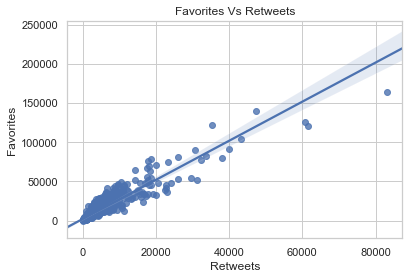

In [37]:
ax = sns.regplot(x=twitter_archive_master.retweet_count, y=twitter_archive_master.favorite_count)
plt.title("Favorites Vs Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.show()

In [38]:
twitter_archive_master.breed.value_counts()

pupper           221
doggo             72
puppo             23
floofer            9
doggo,pupper       9
doggo,puppo        1
doggo,floofer      1
Name: breed, dtype: int64

#### Pupper has the most number of tweets in our data set

In [39]:
# Lets group by breed to get the total number of retweets and favorites by breed
twitter_retweets_by_breed = twitter_archive_master.groupby(['breed'],as_index=False).agg({'retweet_count': np.sum, 'favorite_count': np.sum})
twitter_retweets_by_breed

,breed,retweet_count,favorite_count
0,doggo,467729,1336047
1,"doggo,floofer",3249,16469
2,"doggo,pupper",37056,117088
3,"doggo,puppo",18166,45990
4,floofer,35054,95063
5,pupper,518734,1548702
6,puppo,146081,498461


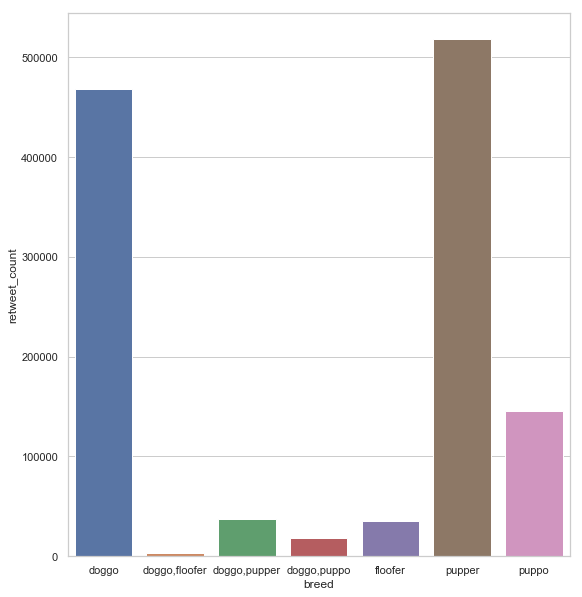

In [10]:
plt.figure(figsize=(9,10))
ax = sns.barplot(x="breed", y="retweet_count", data=twitter_retweets_by_breed)

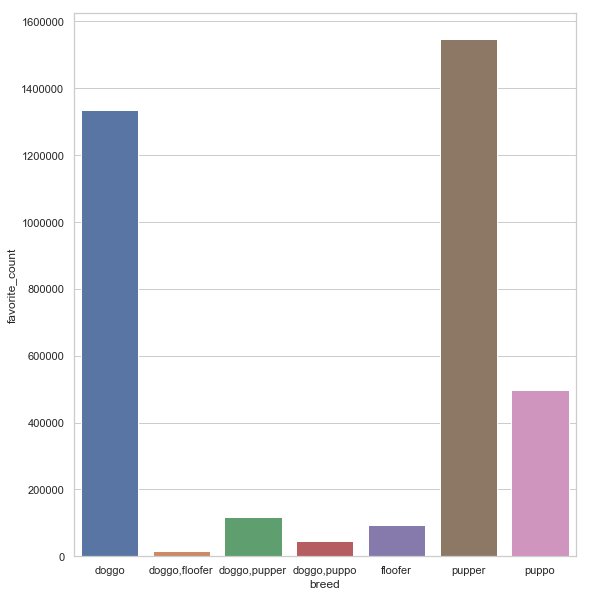

In [40]:
plt.figure(figsize=(9,10))
ax = sns.barplot(x="breed", y="favorite_count", data=twitter_retweets_by_breed)

#### Pupper and Doggo are the ones that have the most retweets and favorite counts

In [49]:
# lets calculate another column called ratings using ratings numerator and ratings denominator

twitter_archive_master['ratings'] = twitter_archive_master['rating_numerator']/twitter_archive_master['rating_denominator']

In [50]:
twitter_archive_master[['rating_numerator','rating_denominator','ratings']].sample(5)

,rating_numerator,rating_denominator,ratings
1535,9.0,10,0.9
1543,11.0,10,1.1
752,8.0,10,0.8
578,10.0,10,1.0
902,6.0,10,0.6


In [51]:
# Now lets calculate the max ratings value by breed
twitter_archive_master.groupby(['breed'],as_index=False).agg({'ratings': np.max})


,breed,ratings
0,doggo,1.4
1,"doggo,floofer",1.1
2,"doggo,pupper",1.3
3,"doggo,puppo",1.3
4,floofer,1.3
5,pupper,1.4
6,puppo,1.4


##### looks like its tie between doggo, pupper and puppo. All three breed type have the highest rating

In [45]:
# Now lets calculate the min ratings value by breed
twitter_archive_master.groupby(['breed'],as_index=False).agg({'ratings': np.min})



,breed,ratings
0,doggo,0.8
1,"doggo,floofer",1.1
2,"doggo,pupper",0.5
3,"doggo,puppo",1.3
4,floofer,1.0
5,pupper,0.3
6,puppo,0.9


#### Pupper also has the min rating of 0.3
##### Interesting observation is doggo,puppo has the same min and max rating of 1.3. Similarly doggo,floofer has the same min and max rating of 1.1. This is becuase they only have one record each in the data set

In [46]:
# Now lets calculate the mean ratings value by breed
twitter_archive_master.groupby(['breed'],as_index=False).agg({'ratings': np.mean})



,breed,ratings
0,doggo,1.184722
1,"doggo,floofer",1.100000
2,"doggo,pupper",1.111111
3,"doggo,puppo",1.300000
4,floofer,1.188889
5,pupper,1.073425
6,puppo,1.200000


##### doggo,puppo breed has highest mean rating of  1.3
##### doggo, puppo and  pupper have max ratings of 1.4  but the number of tweets for doggo and puppo are less compared to the number tweets for puppo
##### Let's find out more about the dog that has max rating of 1.4 and maximum number of retweets and favorites

In [47]:
# Lets look at the data of the dog that received the max rating of 1.4 and of breed "doggo'
max_rated_tweet = twitter_archive_master.query('ratings == 1.4').sort_values(['retweet_count','favorite_count'],ascending = (False, False)).head(1)
max_rated_tweet

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,breed,retweet_count,favorite_count,image_url,prediction,confidence_level,ratings
349,819004803107983360,2017-01-11 02:15:36,This is Bo. He was a very good First Doggo. 14...,14.0,10,Bo,doggo,39854,91771,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,standard_poodle,0.351308,1.4


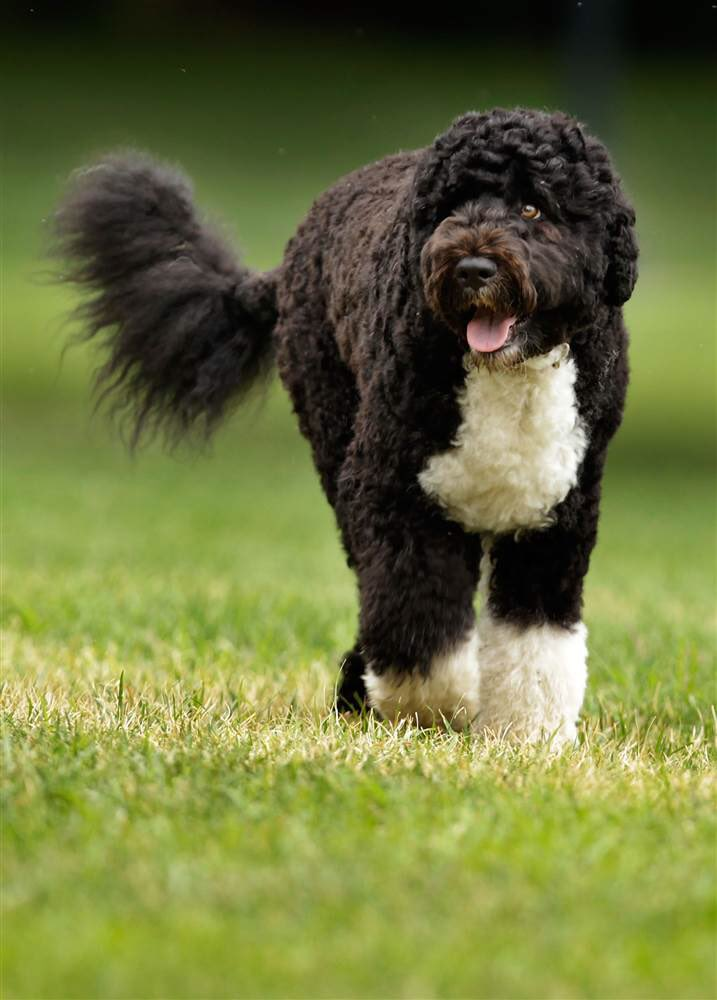

In [48]:
from IPython.display import Image
>>> image = Image('https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg')
>>> image

#####  This is the dog that has the highest rating and most number of retweets and favorites. Hence the most popular dog.